# Analysis and Visuals

In [18]:
library(ggplot2)
library(readr)
library(dplyr)

Warning message:
"package 'readr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [20]:
dailyactivity <- read_csv("dailyActivity_merged.csv", 
    col_types = cols(ActivityDate = col_date(format = "%m/%d/%Y")))

In [4]:
head(dailyactivity)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,day
1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,mardi
1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,mercredi
1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776,jeudi
1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,vendredi
1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,samedi
1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,dimanche


In [21]:
hourlyactivity <- read_csv("hourlyactivity.csv")


-- Column specification --------------------------------------------------------
cols(
  Id = col_double(),
  activityhour = col_datetime(format = ""),
  Calories = col_double(),
  TotalIntensity = col_double(),
  AverageIntensity = col_double(),
  StepTotal = col_double()
)



In [6]:
head(hourlyactivity)

Id,activityhour,Calories,TotalIntensity,AverageIntensity,StepTotal,DayParts
1503960366,2016-04-12 00:00:00,81,20,0.333333,373,overnight
1503960366,2016-04-12 01:00:00,61,8,0.133333,160,overnight
1503960366,2016-04-12 02:00:00,59,7,0.116667,151,overnight
1503960366,2016-04-12 03:00:00,47,0,0.000000,0,overnight
1503960366,2016-04-12 04:00:00,48,0,0.000000,0,overnight
1503960366,2016-04-12 05:00:00,48,0,0.000000,0,overnight


In [7]:
sleepday <- read_csv("sleepday.csv", col_types = cols(sleepday = col_date(format = "%Y-%m-%d")))

ERROR: Error in read_csv("sleepday.csv", col_types = cols(sleepday = col_date(format = "%Y-%m-%d"))): impossible de trouver la fonction "read_csv"


In [8]:
head(sleepday)

Id,sleepday,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
1503960366,2016-04-12,1,327,346
1503960366,2016-04-13,2,384,407
1503960366,2016-04-15,1,412,442
1503960366,2016-04-16,2,340,367
1503960366,2016-04-17,1,700,712
1503960366,2016-04-19,1,304,320


In [9]:
str(dailyactivity)

spec_tbl_df [940 x 16] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id                      : num [1:940] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : Date[1:940], format: "2016-04-12" "2016-04-13" ...
 $ TotalSteps              : num [1:940] 13162 10735 10460 9762 12669 ...
 $ TotalDistance           : num [1:940] 8.5 6.97 6.74 6.28 8.16 ...
 $ TrackerDistance         : num [1:940] 8.5 6.97 6.74 6.28 8.16 ...
 $ LoggedActivitiesDistance: num [1:940] 0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num [1:940] 1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num [1:940] 0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num [1:940] 6.06 4.71 3.91 2.83 5.04 ...
 $ SedentaryActiveDistance : num [1:940] 0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : num [1:940] 25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : num [1:940] 13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes    : num [1:940] 328 217 181 209 221 164 233 264

In [10]:
str(hourlyactivity)

spec_tbl_df [22,099 x 7] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id              : num [1:22099] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ activityhour    : POSIXct[1:22099], format: "2016-04-12 00:00:00" "2016-04-12 01:00:00" ...
 $ Calories        : num [1:22099] 81 61 59 47 48 48 48 47 68 141 ...
 $ TotalIntensity  : num [1:22099] 20 8 7 0 0 0 0 0 13 30 ...
 $ AverageIntensity: num [1:22099] 0.333 0.133 0.117 0 0 ...
 $ StepTotal       : num [1:22099] 373 160 151 0 0 ...
 $ DayParts        : chr [1:22099] "overnight" "overnight" "overnight" "overnight" ...
 - attr(*, "spec")=List of 3
  ..$ cols   :List of 6
  .. ..$ Id              : list()
  .. .. ..- attr(*, "class")= chr [1:2] "collector_double" "collector"
  .. ..$ activityhour    :List of 1
  .. .. ..$ format: chr ""
  .. .. ..- attr(*, "class")= chr [1:2] "collector_datetime" "collector"
  .. ..$ Calories        : list()
  .. .. ..- attr(*, "class")= chr [1:2] "collector_double" "collector"
  .. ..$ TotalIntensity  : 

In [11]:
str(sleepday)

spec_tbl_df [413 x 5] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id                : num [1:413] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ sleepday          : Date[1:413], format: "2016-04-12" "2016-04-13" ...
 $ TotalSleepRecords : num [1:413] 1 2 1 2 1 1 1 1 1 1 ...
 $ TotalMinutesAsleep: num [1:413] 327 384 412 340 700 304 360 325 361 430 ...
 $ TotalTimeInBed    : num [1:413] 346 407 442 367 712 320 377 364 384 449 ...
 - attr(*, "spec")=List of 3
  ..$ cols   :List of 5
  .. ..$ Id                : list()
  .. .. ..- attr(*, "class")= chr [1:2] "collector_double" "collector"
  .. ..$ sleepday          :List of 1
  .. .. ..$ format: chr ""
  .. .. ..- attr(*, "class")= chr [1:2] "collector_date" "collector"
  .. ..$ TotalSleepRecords : list()
  .. .. ..- attr(*, "class")= chr [1:2] "collector_double" "collector"
  .. ..$ TotalMinutesAsleep: list()
  .. .. ..- attr(*, "class")= chr [1:2] "collector_double" "collector"
  .. ..$ TotalTimeInBed    : list()
  .. .. ..- attr(*, "cla

In [12]:
dailyactivity$day <- weekdays(dailyactivity$ActivityDate)

In [13]:
day_check <- dailyactivity %>% 
  group_by(day) %>% 
  summarize(very_active_minutes = mean(VeryActiveMinutes), calories = mean(Calories),
            total_steps = mean(TotalSteps))

ERROR: Error in dailyactivity %>% group_by(day) %>% summarize(very_active_minutes = mean(VeryActiveMinutes), : impossible de trouver la fonction "%>%"


In [14]:
print(day_check)

# A tibble: 7 x 4
  day      very_active_minutes calories total_steps
  <chr>                  <dbl>    <dbl>       <dbl>
1 dimanche                20.0    2263        6933.
2 jeudi                   19.4    2200.       7406.
3 lundi                   23.1    2324.       7781.
4 mardi                   23.0    2356.       8125.
5 mercredi                20.8    2303.       7559.
6 samedi                  21.9    2355.       8153.
7 vendredi                20.1    2332.       7448.


### Check for relationship between calories and total steps

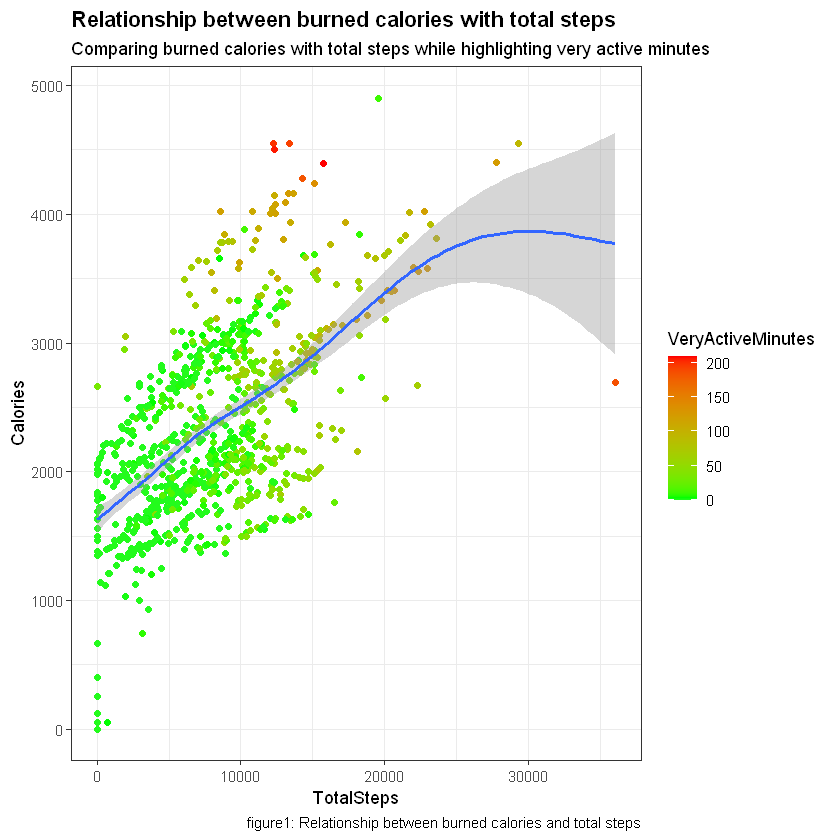

In [22]:
mid <- median(dailyactivity$VeryActiveMinutes)
ggplot(data=dailyactivity, aes(x=TotalSteps, y=Calories, color = VeryActiveMinutes)) +
  geom_point() + geom_smooth(method = "gam", formula = y ~s(x)) +
  scale_color_gradient2(midpoint = mid , low = "blue", mid = "green", high = "red") +
  theme_bw() +
  labs(title = "Relationship between burned calories with total steps",
       subtitle = "Comparing burned calories with total steps while highlighting very active minutes",
       caption = "figure1: Relationship between burned calories and total steps") +
  theme(plot.title = element_text(face = "bold"))

### Check for relationship between calories and sedentary minutes

In [ ]:
mid <- median(dailyactivity$VeryActiveMinutes)
ggplot(data=dailyactivity, aes(x=SedentaryMinutes, y=Calories, color = VeryActiveMinutes)) +
  geom_point() + geom_smooth(method = "gam", formula = y ~s(x)) +
  scale_color_gradient2(midpoint = mid , low = "blue", mid = "green", high = "red") +
  theme_bw() +
  labs(title = "Relationship between burned calories with sedentary minutes",
       subtitle = "Comparing burned calories with sedentary minutes while highlighting very active minutes",
       caption = "figure2: Relationship between burned calories and sedentary minutes") +
  theme(plot.title = element_text(face = "bold"))

### Compare Total time in bed and total time asleep.

In [ ]:
ggplot(data = daily_records, aes(x = TotalMinutesAsleep, y = TotalTimeInBed)) +
  geom_point() + geom_smooth(method = "gam", formula = y ~s(x)) +
  labs(title = "Relationship between Total time in bed and Total time asleep",
       caption = "figure3: Relationship between Total time in bed and Total time asleep") +
  theme_bw() +
  theme(plot.title = element_text(face = "bold"))

In [ ]:
We go to the hourly activity data frame and add a column to separate time to dayparts(overnight, morning, midday, afternoon).

In [ ]:
T <- format(as.POSIXct(hourlyactivity$activityhour), format = "%H:%M:%S")
hourlyactivity <- hourlyactivity %>%
  mutate(DayParts = case_when(
    T < "06:00:00" & T >= "00:00:00" ~ "overnight",
    T < "10:00:00" & T >= "06:00:00" ~ "morning",
    T < "15:00:00" & T >= "10:00:00" ~ "midday",
    T < "19:00:00" & T >= "15:00:00" ~ "afternoon",
    T >= "19:00:00" ~ "evening",
    TRUE ~ "other")
    )

In [ ]:
head(hourlyactivity)

In [ ]:
hourly_review <- hourlyactivity %>% 
  group_by(DayParts) %>% 
  summarize(average_calories = mean(Calories), average_steps = mean(StepTotal))
head(hourly_review)

In [ ]:
ggplot(data = hourly_review, aes(x = DayParts, y = average_steps, fill = DayParts)) +
  geom_col() + theme_bw() +
  labs(title = "Average amount of steps walked through parts of the day",
       caption = "figure4:Average amount of steps walked through parts of the day")

In [ ]:
ggplot(data = hourly_review, aes(x = DayParts, y = average_steps, fill = DayParts)) +
  geom_col() + theme_bw() +
  labs(title = "Average amount of calories burned through parts of the day",
       caption = "figure5:Average amount of calories burned through parts of the day")

# Recommendations and key findings

### Key findings:

* From the data we have and after the analysis is done, We found that lack of activity is strongly associated with non healthy lifestyle.
* By being more active throughout the day we burn more calories which leads to healthier lifestyle.
* Having moderate amount of rest is good for being productive while having very few or too much rest leads to exhaustion.
* Most people are more active during the day.

### Recommendations:

* Notify users when sedentary time is too high.
* Make everyday target for calories to burn for each user based on her background information.
* Make an index to tell if a user had enough sleeping hours.
* Notify users to get out of bed when spending too much time in bed after waking up.
* The app should adjust targets depending on how metrics change.